# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Read Dataset

In [2]:
df_svm_spotify = pd.read_csv('Spotify Song Attributes.csv')

In [3]:
df_svm_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


# Drop Columns Non-Numerik

In [15]:
df_svm_spotify = df_svm_spotify.drop(columns=["id","song_title", "artist"], errors="ignore")
df_svm_spotify.head()

df_svm_spotify.columns


Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')

# Cek Missing Values

In [5]:
df_svm_spotify.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64

In [6]:
df_svm_spotify.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


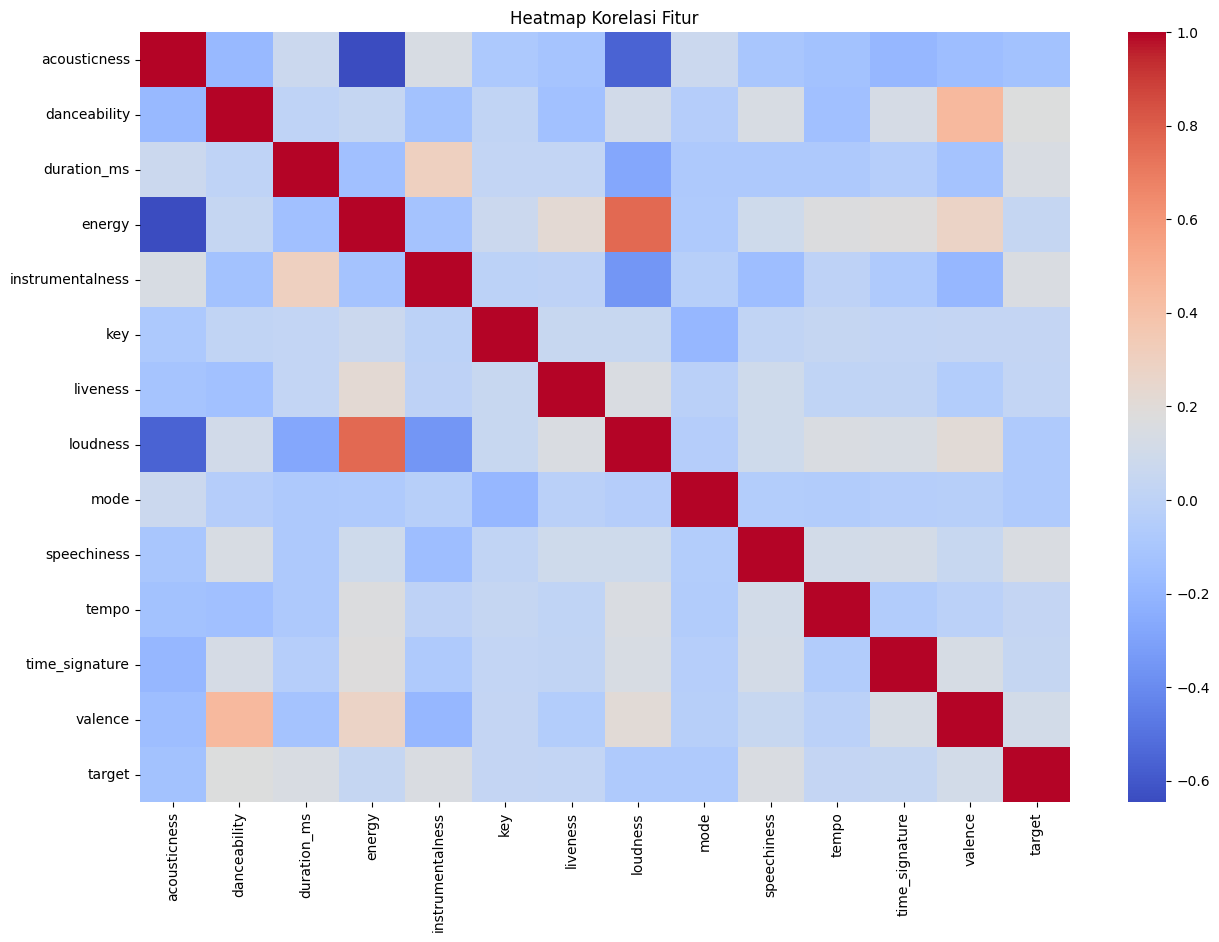

In [7]:
plt.figure(figsize=(15,10))
corr = df_svm_spotify.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()

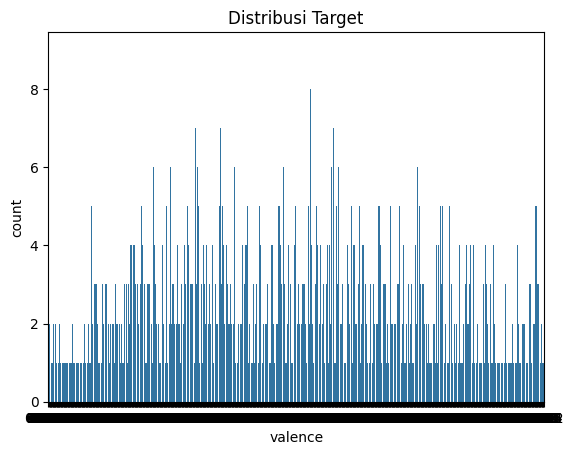

In [8]:
sns.countplot(x=df_svm_spotify["valence"])
plt.title("Distribusi Target")
plt.show()

In [9]:
X = df_svm_spotify.drop(columns=["valence"]).values
y = df_svm_spotify["valence"].values



In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# M

In [12]:
def evaluate(model_svr, y_true, y_predict):
    mae = mean_absolute_error(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_predict)
    return mae, mse, rmse, r2



predict_svr = model_svr.predict(X_test_scaled)
evaluate("SVR RBF", y_test, predict_svr)

NameError: name 'model_svr' is not defined

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(predict_svr)), predict_svr, label="Predicted", alpha=0.6)
plt.title("Actual vs Predicted - SVR RBF")
plt.xlabel("Index")
plt.ylabel("Valence")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

y_test_plot = pd.Series(y_test).reset_index(drop=True)
pred_plot = pd.Series(predict_svr)
plt.figure(figsize=(6,6))

plt.scatter(y_test_plot, pred_plot, alpha=0.6)
plt.plot([0,1], [0,1], color="red", linestyle="--")  # garis perfect prediction

plt.title("Actual vs Predicted Valence (SVR RBF)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

plt.show()




In [ ]:
pickle.dump(model_svr, open("svr_rbf.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
